In [40]:
# imported from google colab
#https://colab.research.google.com/drive/19b5Hn1BLEva9jNn5mWisg69YmXPjqa6o#scrollTo=VgwkAX-8WdDI

Step 3: Optimize the Model
Using your knowledge of TensorFlow, optimize your model to achieve a target predictive accuracy higher than 75%.

Use any or all of the following methods to optimize your model:

Adjust the input data to ensure that no variables or outliers are causing confusion in the model, such as:
Dropping more or fewer columns.
Creating more bins for rare occurrences in columns.
Increasing or decreasing the number of values for each bin.
Add more neurons to a hidden layer.
Add more hidden layers.
Use different activation functions for the hidden layers.
Add or reduce the number of epochs to the training regimen.
Note: If you make at least three attempts at optimizing your model, you will not lose points if your model does not achieve target performance.

Create a new Google Colab file and name it AlphabetSoupCharity_Optimization.ipynb.

Import your dependencies and read in the charity_data.csv to a Pandas DataFrame.

Preprocess the dataset as you did in Step 1. Be sure to adjust for any modifications that came out of optimizing the model.

Design a neural network model, and be sure to adjust for modifications that will optimize the model to achieve higher than 75% accuracy.

Save and export your results to an HDF5 file. Name the file AlphabetSoupCharity_Optimization.h5.

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

2024-08-13 13:46:18.107882: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# categorical = APPLICATION_TYPE, AFFILIATION, CLASSIFICATION, USE_CASE, ORGANIZATION, 'INCOME_AMT,' SPECIAL_CONSIDERATIONS

In [3]:
application_df.shape

(34299, 12)

In [4]:
application_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df.head(1)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1


In [6]:
# Determine the number of unique values in each column.
application_df.nunique()


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
value_counts_APPTYPE = application_df['APPLICATION_TYPE'].value_counts()
value_counts_APPTYPE

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [8]:
# [print(APPTYPE) for x in application_df['APPLICATION_TYPE'].value_counts() if x<50]

[print(APPTYPE) for APPTYPE, count in zip(value_counts_APPTYPE.index, value_counts_APPTYPE.values) if count<50]

T12
T2
T25
T14
T29
T15
T17


[None, None, None, None, None, None, None]

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = []
[application_types_to_replace.append(APPTYPE) for APPTYPE, count in zip(value_counts_APPTYPE.index, value_counts_APPTYPE.values) if count<50]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: count, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
value_counts_CLASS = application_df['CLASSIFICATION'].value_counts()
print(list(zip(value_counts_CLASS.index, value_counts_CLASS.values)))

[('C1000', 17326), ('C2000', 6074), ('C1200', 4837), ('C3000', 1918), ('C2100', 1883), ('C7000', 777), ('C1700', 287), ('C4000', 194), ('C5000', 116), ('C1270', 114), ('C2700', 104), ('C2800', 95), ('C7100', 75), ('C1300', 58), ('C1280', 50), ('C1230', 36), ('C1400', 34), ('C7200', 32), ('C2300', 32), ('C1240', 30), ('C8000', 20), ('C7120', 18), ('C1500', 16), ('C1800', 15), ('C6000', 15), ('C1250', 14), ('C8200', 11), ('C1238', 10), ('C1278', 10), ('C1235', 9), ('C1237', 9), ('C7210', 7), ('C2400', 6), ('C1720', 6), ('C4100', 6), ('C1257', 5), ('C1600', 5), ('C1260', 3), ('C2710', 3), ('C0', 3), ('C3200', 2), ('C1234', 2), ('C1246', 2), ('C1267', 2), ('C1256', 2), ('C2190', 1), ('C4200', 1), ('C2600', 1), ('C5200', 1), ('C1370', 1), ('C1248', 1), ('C6100', 1), ('C1820', 1), ('C1900', 1), ('C1236', 1), ('C3700', 1), ('C2570', 1), ('C1580', 1), ('C1245', 1), ('C2500', 1), ('C1570', 1), ('C1283', 1), ('C2380', 1), ('C1732', 1), ('C1728', 1), ('C2170', 1), ('C4120', 1), ('C8210', 1), ('C2

In [11]:
application_df.nunique()

APPLICATION_TYPE            11
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = []
[classifications_to_replace.append(CLASSTYPE) for CLASSTYPE, count in zip(value_counts_CLASS.index, value_counts_CLASS.values) if count < 190]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1003
C7000      777
C1700      287
C4000      194
Name: count, dtype: int64

In [13]:
application_df.nunique()

APPLICATION_TYPE            11
AFFILIATION                  6
CLASSIFICATION               9
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [14]:
application_df['INCOME_AMT'] =application_df['INCOME_AMT'].astype("string")

In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_series = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION','INCOME_AMT', 'SPECIAL_CONSIDERATIONS']
application_df_dummies = pd.get_dummies(application_df, columns=categorical_series)
application_df_dummies.nunique()


STATUS                             2
ASK_AMT                         8747
IS_SUCCESSFUL                      2
APPLICATION_TYPE_Other             2
APPLICATION_TYPE_T10               2
APPLICATION_TYPE_T13               2
APPLICATION_TYPE_T19               2
APPLICATION_TYPE_T3                2
APPLICATION_TYPE_T4                2
APPLICATION_TYPE_T5                2
APPLICATION_TYPE_T6                2
APPLICATION_TYPE_T7                2
APPLICATION_TYPE_T8                2
APPLICATION_TYPE_T9                2
AFFILIATION_CompanySponsored       2
AFFILIATION_Family/Parent          2
AFFILIATION_Independent            2
AFFILIATION_National               2
AFFILIATION_Other                  2
AFFILIATION_Regional               2
CLASSIFICATION_C1000               2
CLASSIFICATION_C1200               2
CLASSIFICATION_C1700               2
CLASSIFICATION_C2000               2
CLASSIFICATION_C2100               2
CLASSIFICATION_C3000               2
CLASSIFICATION_C4000               2
C

In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df_dummies['IS_SUCCESSFUL'].values
target_removed_df = application_df_dummies.copy()
target_removed_df.drop(['IS_SUCCESSFUL'], axis=1)
X = target_removed_df.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.8025 - loss: 0.4488
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.9973 - loss: 0.0202
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.9978 - loss: 0.0076
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.9987 - loss: 0.0033
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.9989 - loss: 0.0020
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9996 - loss: 0.0018
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9998 - loss: 0.0011
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9999 - loss: 7.5429e-04
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.9999 - loss: 5.0432e-04
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.9999 - loss: 5.9444e-04
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 1.0000 - loss: 3.0869e-04
Epoch 12/

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step - accuracy: 1.0000 - loss: 5.6975e-05
Epoch 66/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 1.0000 - loss: 6.2509e-05
Epoch 67/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.9999 - loss: 2.4907e-04
Epoch 68/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 1.0000 - loss: 1.1863e-04
Epoch 69/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.9999 - loss: 4.4814e-04
Epoch 70/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 1.0000 - loss: 1.1073e-04
Epoch 71/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 1.0000 - loss: 1.2367e-04
Epoch 72/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.9999 - loss: 2.6858e-04
Epoch 73/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 1.0000 - loss: 3.8911e-05
Epoch 74/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 1.0000 - loss: 1.0514e-04
Epoch 75/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 1.000

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 876us/step - accuracy: 0.9997 - loss: 0.0030
Loss: 0.0029633950907737017, Accuracy: 0.9996501207351685


In [22]:
# Export our model to HDF5 file - AlphabetSoupCharity.h5
nn.save('AlphabetSoupCharity.h5')

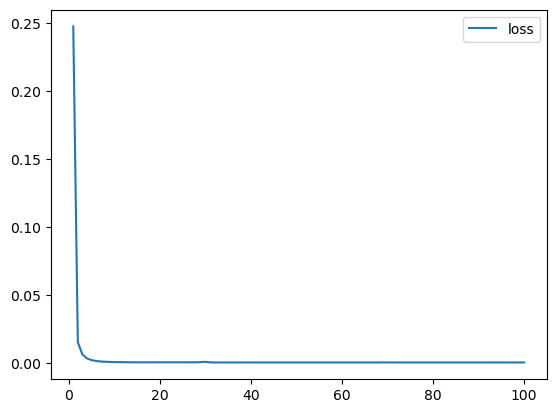

In [23]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

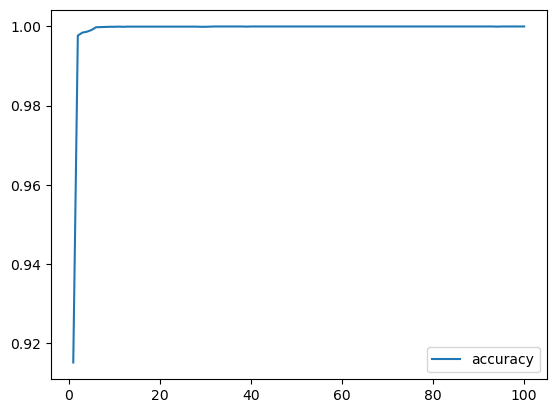

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

second model - more hidden layers - pyramid style

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features_b = len(X_train[0])
hidden_nodes_layer1_b =  8
hidden_nodes_layer2_b = 64
hidden_nodes_layer3_b = 24
hidden_nodes_layer4_b = 4

nn_b = tf.keras.models.Sequential()

# First hidden layer
nn_b.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1_b, input_dim=number_input_features_b, activation="relu")
)

# Second hidden layer
nn_b.add(tf.keras.layers.Dense(units=hidden_nodes_layer2_b, activation="relu"))


# Third hidden layer
nn_b.add(tf.keras.layers.Dense(units=hidden_nodes_layer3_b, activation="relu"))

# fourth hidden layer
nn_b.add(tf.keras.layers.Dense(units=hidden_nodes_layer4_b, activation="relu"))

# Output layer
nn_b.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_b.summary()

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,641 (10.32 KB)

 Trainable params: 2,641 (10.32 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compile the model
nn_b.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Train the model
fit_model_b = nn_b.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8942 - loss: 0.2671
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.9983 - loss: 0.0156
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9994 - loss: 0.0042
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.9993 - loss: 0.0052
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - accuracy: 0.9992 - loss: 0.0034
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 0.9997 - loss: 7.7361e-04
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 0.9999 - loss: 4.4167e-04
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 1.0000 - loss: 2.7645e-04
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - accuracy: 0.9999 - loss: 2.7576e-04
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.9999 - loss: 7.9898e-04
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 1.0000 - loss: 2.3805e-04

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 1.0000 - loss: 6.9283e-11
Epoch 67/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 1.0000 - loss: 8.6609e-11
Epoch 68/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 6.2416e-11
Epoch 69/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 1.0000 - loss: 3.8890e-11
Epoch 70/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.6553e-11
Epoch 71/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.0943e-11
Epoch 72/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.3170e-11  
Epoch 73/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.2604e-11
Epoch 74/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.5744e-11
Epoch 75/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.7902e-11
Epoch 76/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 1.0000 - loss: 2.

In [28]:
model_loss, model_accuracy = nn_b.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 1.0000 - loss: 1.2513e-10
Loss: 1.2513438896188944e-10, Accuracy: 1.0


In [29]:
# Export our model to HDF5 file - AlphabetSoupCharity.h5
nn_b.save('AlphabetSoupCharity_Optomization_b.h5')

third model - more neurons up front

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features_c = len(X_train[0])
hidden_nodes_layer1_c =  2000
hidden_nodes_layer2_c = 500
hidden_nodes_layer3_c = 50
hidden_nodes_layer4_c = 10

nn_c = tf.keras.models.Sequential()

# First hidden layer
nn_c.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1_c, input_dim=number_input_features_c, activation="relu")
)

# Second hidden layer
nn_c.add(tf.keras.layers.Dense(units=hidden_nodes_layer2_c, activation="relu"))


# Third hidden layer
nn_c.add(tf.keras.layers.Dense(units=hidden_nodes_layer3_c, activation="relu"))

# fourth hidden layer
nn_c.add(tf.keras.layers.Dense(units=hidden_nodes_layer4_c, activation="relu"))

# Output layer
nn_c.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_c.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 2000)           │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │     1,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │        25,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,126,071 (4.30 MB)

 Trainable params: 1,126,071 (4.30 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Compile the model
nn_c.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
# Train the model
fit_model_c = nn_c.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9745 - loss: 0.0789
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9978 - loss: 0.0087
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9983 - loss: 0.0054
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9991 - loss: 0.0030
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9987 - loss: 0.0079
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9993 - loss: 0.0026
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9993 - loss: 9.5990e-04
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9994 - loss: 0.0017
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9989 - loss: 0.0056
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9995 - loss: 7.3098e-04
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9994 - loss: 6.7717e-04
Epoch 1

804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 1.0000 - loss: 1.2368e-05
Epoch 66/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 1.0000 - loss: 2.1787e-05
Epoch 67/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 1.0000 - loss: 1.0362e-05
Epoch 68/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 1.0000 - loss: 1.8270e-05
Epoch 69/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 1.0000 - loss: 6.5015e-06
Epoch 70/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 1.0000 - loss: 6.1819e-06
Epoch 71/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 1.0000 - loss: 1.1335e-05
Epoch 72/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 1.0000 - loss: 1.1092e-05
Epoch 73/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 1.0000 - loss: 4.7797e-06
Epoch 74/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 1.0000 - loss: 8.1273e-06
Epoch 75/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 1.000

In [33]:
model_loss, model_accuracy = nn_c.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 2ms/step - accuracy: 0.9999 - loss: 0.0011
Loss: 0.0010643453570082784, Accuracy: 0.9998833537101746


In [34]:
# Export our model to HDF5 file - AlphabetSoupCharity.h5
nn_c.save('AlphabetSoupCharity_Optomization_c.h5')

fourth model - change activation

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features_d = len(X_train[0])
hidden_nodes_layer1_d =  8
hidden_nodes_layer2_d = 5

nn_d = tf.keras.models.Sequential()

# First hidden layer
nn_d.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1_d, input_dim=number_input_features_d, activation="relu")
)

# Second hidden layer
nn_d.add(tf.keras.layers.Dense(units=hidden_nodes_layer2_d, activation="sigmoid"))

# Output layer
nn_d.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_d.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 8)              │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Compile the model
nn_d.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Train the model
fit_model_d = nn_d.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 734us/step - accuracy: 0.6463 - loss: 0.6255
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.9990 - loss: 0.1071
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - accuracy: 0.9996 - loss: 0.0398
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - accuracy: 0.9998 - loss: 0.0203
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 1.0000 - loss: 0.0116
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 1.0000 - loss: 0.0072
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.9999 - loss: 0.0048
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - accuracy: 1.0000 - loss: 0.0031
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 1.0000 - loss: 0.0022
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 1.0000 - loss: 0.0014
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 1.0000 - loss: 9.0778e-04
Epoch 12/100
80

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 1.0000 - loss: 1.2875e-08
Epoch 66/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 1.0000 - loss: 1.3036e-08
Epoch 67/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 1.0000 - loss: 1.2553e-08
Epoch 68/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 1.0000 - loss: 1.3952e-08
Epoch 69/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 1.0000 - loss: 1.2968e-08
Epoch 70/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 1.0000 - loss: 1.2570e-08
Epoch 71/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 1.0000 - loss: 1.2551e-08
Epoch 72/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 1.0000 - loss: 1.2652e-08
Epoch 73/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - accuracy: 1.0000 - loss: 1.3242e-08
Epoch 74/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 1.0000 - loss: 1.2313e-08
Epoch 75/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 1.000

In [38]:
model_loss, model_accuracy = nn_d.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 859us/step - accuracy: 0.9995 - loss: 0.0055
Loss: 0.005535146687179804, Accuracy: 0.9995335340499878


In [39]:
# Export our model to HDF5 file - AlphabetSoupCharity.h5
nn_d.save('AlphabetSoupCharity_Optomization_d.h5')